In [ ]:

# Libraries
import sys
import os

# Add src folder to path
sys.path.append(os.path.abspath('../models'))
import numpy as np
from matplotlib import pyplot as plt
import torch
import torch.nn as nn
from ..Models.VAE_128 import ConvolutionalVariationalAutoencoder, VariationalInference

In [ ]:
experiments_folder = os.path.abspath('../Experiments')
trained_network_path = os.path.join(experiments_folder, "model_26_e3_0.75_200epochs/model_weights_26_e3_0.75_200epochs.pth")

latent_features = 26
cvae = ConvolutionalVariationalAutoencoder(128, latent_features)
cvae.load_state_dict(torch.load(trained_network_path,map_location=torch.device('cpu')))
vi = VariationalInference(beta=0.75)

torch.Size([1, 1, 128, 128])


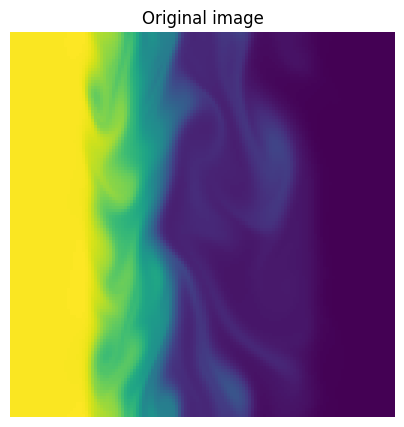

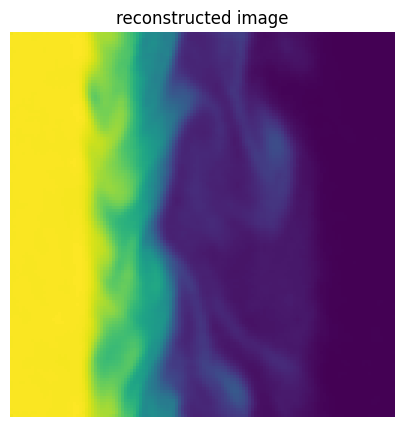

In [19]:
# Load images
data_folder = os.path.abspath('../data_numpy')
images_path = os.path.join(data_folder, 'density_large128.npy')
images = np.load(images_path)
x = torch.tensor(images, dtype=torch.float32) # (N, W, H)

# Ensure that our model works
example = x[0, :, :].unsqueeze(0).unsqueeze(0)
print(example.shape)
with torch.no_grad():
    outputs = cvae(example)
    px = outputs['px']
    x_hat = px.mean
    x_hat_np = x_hat.cpu().numpy()
    img_recon = x_hat_np.T[::-1, :]

plt.figure(figsize=(5, 5))
plt.imshow(example[0,0,:,:].T, origin='lower', cmap="viridis")
plt.title("Original image")
plt.axis("off")
plt.show()

plt.figure(figsize=(5, 5))
plt.imshow(x_hat_np[0,0,:,:].T, origin='lower', cmap="viridis")
plt.title("reconstructed image")
plt.axis("off")
plt.show()

px shape: torch.Size([1, 1, 128, 128])
Latent space sample: torch.Size([1, 26])


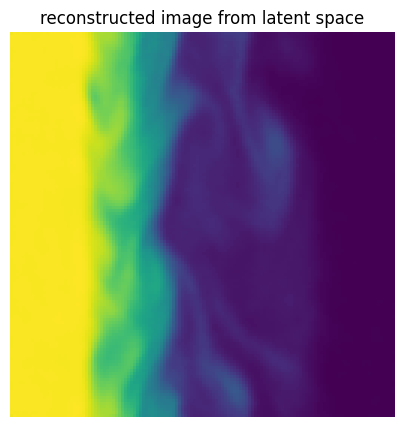

In [20]:
# Find latent space and see if we can reconstruct it with example
with torch.no_grad():
    outputs = cvae(example)
    px = outputs['px'] # Normal distribution
    pz = outputs['pz'] # Reparameterized gaussian
    z = outputs['z']
    qz = outputs['qz']

    print(f"px shape: {px.mean.shape}")
    print(f"Latent space sample: {z.shape}")

    z_output = cvae.observation_model(z)
    z_hat = z_output.mean
    z_hat_np = z_hat.cpu().numpy()
    z_img_recon = z_hat_np.T[::-1, :]

plt.figure(figsize=(5, 5))
plt.imshow(x_hat_np[0,0,:,:].T, origin='lower', cmap="viridis")
plt.title("reconstructed image from latent space")
plt.axis("off")
plt.show()


In [21]:
if x.ndim == 3:
    x = x.unsqueeze(1)

with torch.no_grad():
    outputs = cvae(x)
    z = outputs['z'] # Getting the latent space samples
    latent_space_sample = z.cpu().numpy()


#np.save('data_numpy/latent_features_rolled128.npy',latent_space_sample)

(501, 26)
torch.Size([1, 26])


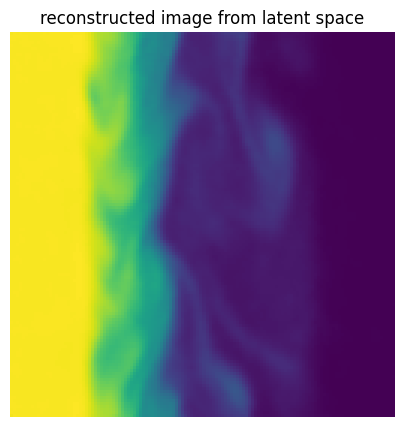

In [22]:
# Ensure that it is correct
latent_features_path = os.path.join(data_folder, 'latent_features_rolled128.npy')
new_latent_space_samples = np.load(latent_features_path)

with torch.no_grad():
    print(latent_space_sample.shape)
    z_input = torch.tensor(new_latent_space_samples[0], dtype=torch.float32).unsqueeze(0)
    print(z_input.shape)
    z_output = cvae.observation_model(z_input)
    z_hat = z_output.mean
    z_hat_np = z_hat.cpu().numpy()
    z_img_recon = z_hat_np.T[::-1, :]

plt.figure(figsize=(5, 5))
plt.imshow(z_hat_np[0,0,:,:].T, origin='lower', cmap="viridis")
plt.title("reconstructed image from latent space")
plt.axis("off")
plt.show()